<a href="https://colab.research.google.com/github/ritagomes187/MFES/blob/main/RitaGomes_pg50723.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# TPC1 - SAT Solving**

# Rita Mendes Gomes, pg50723

Mestrado em Engenharia Informática


# Exercício 1:

As variáveis proposicionais consideradas na resolução do problema são as seguintes:


*  CPU1 = 1
*  CPU2 = 2
*  RAM1 = 3
*  RAM2 = 4
*  MB1 = 5
*  MB2 = 6
*  PG1 = 7
*  PG2 = 8
*  PG3 = 9
*  MON1 = 10
*  MON2 = 11


Note que a variável MON3 não entra neste conjunto precisamente pelo facto de não ser importante para o problema visto nunca ser referida nas regras do enunciado.

Em primeiro lugar, sabemos que cada computador tem que
ter obrigatoriamente uma única motherboard, um único CPU, uma única placa gráfica e uma
única memória RAM, o que se traduz nas seguinte expressões:

* única motherboard: (MB1  ⋁ MB2) ⋀ (¬MB1  ⋁ ¬MB2)
* único CPU: (CPU1  ⋁ CPU2) ⋀ (¬CPU1  ⋁ ¬CPU2)
* única placa gráfica: (PG1 ⋀ ¬PG2 ⋀ ¬PG3)  ⋁ (¬PG1 ⋀ PG2 ⋀ ¬PG3)  ⋁ (¬PG1 ⋀ ¬PG2 ⋀ PG3) <=>
(PG2  ⋁ PG1  ⋁ PG3) ⋀ (¬PG1  ⋁ ¬PG2) ⋀(PG2  ⋁ ¬PG3  ⋁ ¬PG1) ⋀ (¬PG1  ⋁ ¬PG3) ⋀ (¬PG3  ⋁ PG1 ⋁ ¬PG2) ⋀ (¬PG3  ⋁ ¬PG2) = 
(¬PG1  ⋁ ¬PG2) ⋀ (¬PG1  ⋁ ¬PG3)⋀(PG1  ⋁ PG2  ⋁ PG3) ⋀ (¬PG2  ⋁ ¬PG3)
* única memória RAM: (RAM1 ⋁ RAM2) ⋀ (¬RAM2 ⋁ ¬RAM1)


Para além disso, a personalização do
computador deverá obedecer às seguintas regras:

1. A motherboard MB1 quando combinada com a placa gráfica PG1, obriga à utilização da RAM1.
2. A placa gráfica PG1 precisa do CPU1, excepto quando combinada com uma memória
RAM2.
3. O CPU2 só pode ser instalado na motherboard MB2.
4. O monitor MON1 para poder funcionar precisa da placa gráfica PG1 e da memória
RAM2.
5. O monitor MON2 precisa da memória RAM2 para poder trabalhar com a placa gráfica PG3.

Estas regras foram traduzidas para fórmulas proposicionais:

1. MB1 ⋀ PG1 → RAM1	
2. PG1 →  (CPU1 ⋁ RAM2)
3. CPU2 →  MB2
4. MON1 →  (PG1 ⋀ RAM2)
5. (MON2 ⋀ PG3) →  RAM2

De seguida, traduzi estas fórmulas proposicionais para CNF:

1. ¬MB1 ⋁ ¬PG1 ⋁ RAM1
2. ¬PG1 ⋁ RAM2 ⋁ CPU1 
3. ¬CPU2 ⋁ MB2
4. (¬MON1 ⋁ PG1) ⋀ (¬MON1 ⋁ RAM2)
5. ¬MON2 ⋁ ¬PG3 ⋁ RAM2



# Exercício 2:

Para codificar o problema num SAT solver, foi criado o ficheiro tpc1SAT.cnf, onde foi escrito o seguinte:

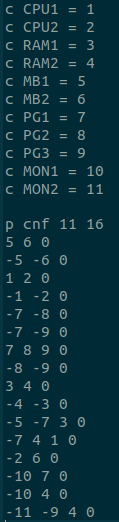

Após a invocação do solver MiniSat foi obtido o seguinte output:

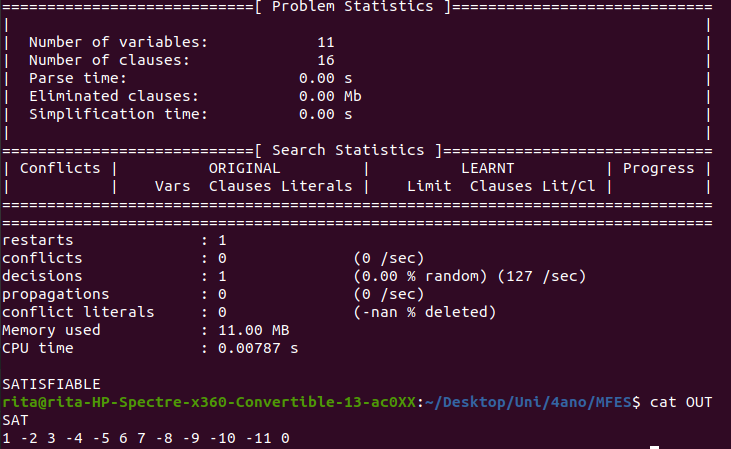

Ou seja, CPU1 = 1, CPU2 = 0, RAM1 = 1, RAM2 = 0, MB1 = 0, MB2 = 1, PG1 = 1, PG2 = 0, PG3 = 0, MON1 = 0, MON2 = 0.

O problema é então satisfazível, uma vez que foi atribuído um valor a todas as variáveis de forma a que as fórmulas proposicionais do modelo sejam verdadeiras. Sendo assim, é possível concluir que o conjunto de regras é consistente.




# Exercício 3:

Para responder às seguintes questões indiquei para cada alínea a fórmula proposicional correspondente e a conversão desta para CNF. De seguida, apresento o input e o output obtido através de imagens.

Seja ɼ = {¬MB1 ⋁ ¬PG1 ⋁ RAM1,  ¬PG1 ⋁ RAM2 ⋁ CPU1, ¬CPU2 ⋁ MB2, ¬MON1 ⋁ PG1, ¬MON1 ⋁ RAM2, ¬MON2 ⋁ ¬PG3 ⋁ RAM2}

**a)** O monitor MON1 só poderá ser usado com uma motherboard MB1 ?

MON1  →  MB1 ⇔ ¬MON1 ⋁  MB1 ?


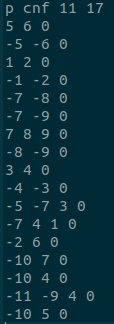



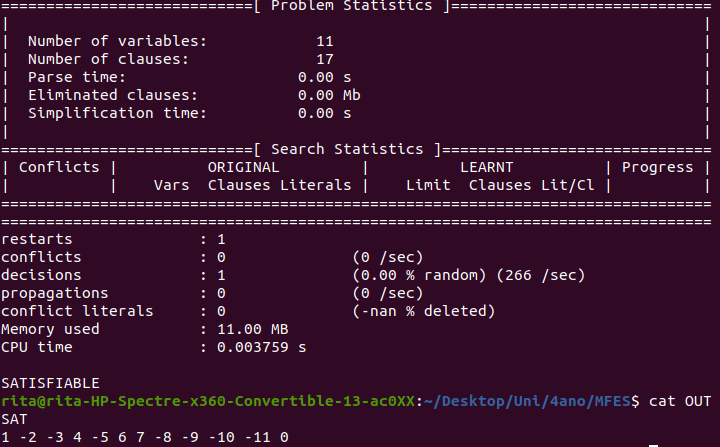

Tal como foi possível verificar através do MiniSat, o modelo é satisfazível, logo podemos concluir que a afirmação é incorreta.



**b)** Um cliente pode personalizar o seu computador da seguinte forma: uma motherboard MB1, o CPU1, a placa gráfica PG2 e a memória RAM1 ?

MB1 ⋀ CPU1 ⋀ PG2 ⋀ RAM1?





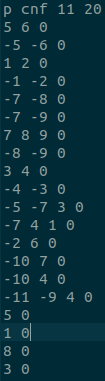



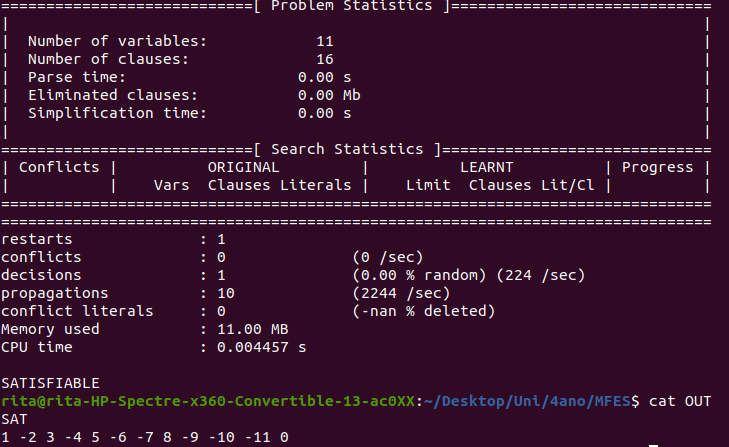


Neste caso, para mostrar que a afirmação é verdadeira é necessário verificar, através do MiniSat, se o modelo juntamente com a fórmula é satisfazível. Como comprovamos pelo output obtido (SAT) existe uma forma de personaliar o computador do cliente dessa forma, o que comprova a validade da afirmação.


**c)** E possivel combinar a motherboard MB2, a placa gráfica PG3 e a RAM1 num mesmo computador ?

MB2 ⋀ PG3 ⋀ RAM1 ?


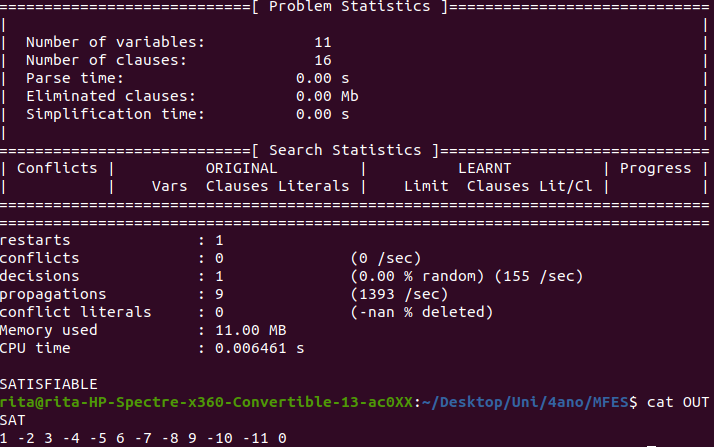

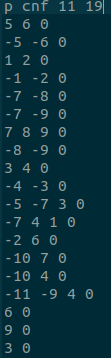



Neste caso, para mostrar que a afirmação é verdadeira é necessário verificar, através do MiniSat, se o modelo juntamente com a fórmula é satisfazível. Como comprovamos pelo output obtido (SAT) existe uma forma de combinar esses aspetos num mesmo computador, o que comprova a validade da afirmação.




**d)** Para combinarmos a placa gráfica PG2 e a RAM1 temos que usar o CPU2 ?

PG2 ⋀ RAM1  →  CPU2  ⇔ (¬PG2 ⋁  ¬RAM1) ⋁  CPU2?


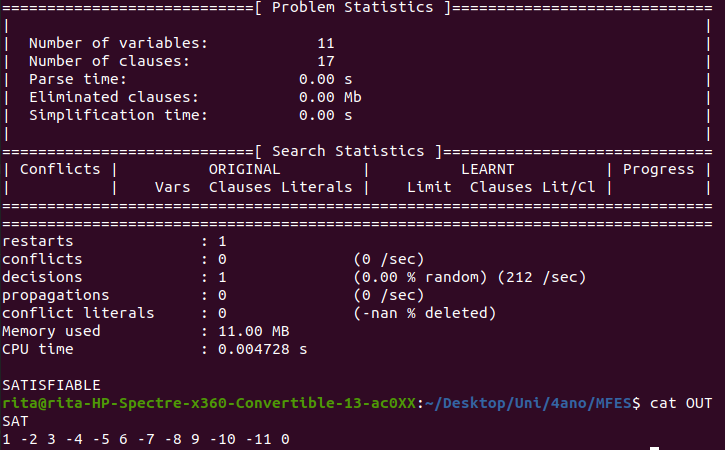

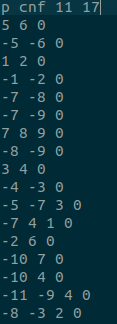

Tal como foi possível verificar através do MiniSat, o modelo é satisfazível, logo podemos concluir que a afirmação é incorreta.
